In [26]:
# Import all the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load The Data

In [205]:
data=pd.read_csv("/content/car_details_v3 (1).csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
data.shape

(8128, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [11]:
data.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [21]:
data.dropna(inplace=True)
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

##Data Pre-processing

###Convert Engine Column from Character to Integer Vector

In [164]:
data.engine

0       1248 CC
1       1498 CC
2       1497 CC
3       1396 CC
4       1298 CC
         ...   
8123    1197 CC
8124    1493 CC
8125    1248 CC
8126    1396 CC
8127    1396 CC
Name: engine, Length: 8128, dtype: object

In [165]:
# Remove rows with NaN values
data = data.dropna(subset=['engine'])

# Extract numeric part of the string and convert it to integer
data['engine'] = data['engine'].str.split(' ').str[0].astype(int)

<ipython-input-165-c6c49b10c484>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['engine'] = data['engine'].str.split(' ').str[0].astype(int)


In [166]:
data['engine'].dtype
data.engine

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8123    1197
8124    1493
8125    1248
8126    1396
8127    1396
Name: engine, Length: 7907, dtype: int64

###Convert Mileage Column from Character to Numeric Vector

In [167]:
data['mileage']

0        23.4 kmpl
1       21.14 kmpl
2        17.7 kmpl
3        23.0 kmpl
4        16.1 kmpl
           ...    
8123     18.5 kmpl
8124     16.8 kmpl
8125     19.3 kmpl
8126    23.57 kmpl
8127    23.57 kmpl
Name: mileage, Length: 7907, dtype: object

In [168]:
# Extract numeric part of the string and convert it to integer
data['mileage'] = data['mileage'].str.split(' ').str[0].astype(float)
data['mileage']

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8123    18.50
8124    16.80
8125    19.30
8126    23.57
8127    23.57
Name: mileage, Length: 7907, dtype: float64

###Convert Max Power Column from Character to Numeric Vector

In [169]:
data['max_power']

0           74 bhp
1       103.52 bhp
2           78 bhp
3           90 bhp
4         88.2 bhp
           ...    
8123     82.85 bhp
8124       110 bhp
8125      73.9 bhp
8126        70 bhp
8127        70 bhp
Name: max_power, Length: 7907, dtype: object

In [170]:
# Extract numeric part of the string before 'bhp'
data['max_power'] = data['max_power'].str.extract(r'(\d+\.?\d*)').astype(float)
data['max_power']

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 7907, dtype: float64

###Convert Fuel Types to Binary

In [171]:
data['fuel'].value_counts()

fuel
Diesel    4299
Petrol    3520
CNG         53
LPG         35
Name: count, dtype: int64

In [172]:
# Remove rows where 'fuel' column contains 'CNG' or 'LPG'
fuel_data = data[~data['fuel'].str.strip().isin(['CNG', 'LPG'])]

# Count occurrences of each fuel type
fuel_counts = fuel_data['fuel'].value_counts()

print(fuel_counts)

fuel
Diesel    4299
Petrol    3520
Name: count, dtype: int64


In [173]:
# Create an empty list to store fuel_type values
fuel_type = []

for fuel_data in data['fuel']:
    if fuel_data == "Petrol":
        fuel_type.append(1)
    else:
        fuel_type.append(0)

data['fuel_type'] = fuel_type

data.drop(columns=['fuel'], inplace=True)
data['fuel_type'].value_counts()

fuel_type
0    4387
1    3520
Name: count, dtype: int64

###Convert Transmission Types to Binary

In [174]:
data['transmission'].value_counts()

transmission
Manual       6866
Automatic    1041
Name: count, dtype: int64

In [175]:
transmission_type = []

for transmission in data['transmission']:
    if transmission == "Manual":
        transmission_type.append(1)
    else:
        transmission_type.append(0)

data['transmission_type'] = transmission_type

data.drop(columns=['transmission'], inplace=True)
data['transmission_type'].value_counts()

transmission_type
1    6866
0    1041
Name: count, dtype: int64

###Convert Seller Types to Binary

In [206]:
data['seller_type'].value_counts()

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

In [207]:
# Remove rows where 'seller_type' column contains 'Trustmark Dealer'
seller_data = data[~data['seller_type'].str.strip().isin(['Trustmark Dealer'])]

# Count occurrences of each fuel type
seller_counts = seller_data['seller_type'].value_counts()

print(seller_counts)

seller_type
Individual    6766
Dealer        1126
Name: count, dtype: int64


In [208]:
# Create an empty list to store fuel_type values
seller = []

for seller_data in data['seller_type']:
    if seller_data == "Individual":
        seller.append(1)
    else:
        seller.append(0)

data['seller'] = seller

data.drop(columns=['seller_type'], inplace=True)
data['seller'].value_counts()

seller
1    6766
0    1362
Name: count, dtype: int64

###Convert Owner Types to Binary

In [181]:
data['owner'].value_counts()

owner
First Owner             5215
Second Owner            2017
Third Owner              509
Fourth & Above Owner     160
Test Drive Car             5
Name: count, dtype: int64

In [183]:
# Iterate over each row in 'owner' column
for index, row in data.iterrows():
    # Remove leading and trailing whitespaces
    temp_val = row['owner'].strip()

    # Check if 'owner' value matches specific categories and remove corresponding rows
    if temp_val in ["Fourth & Above Owner", "Third Owner", "Test Drive Car"]:
        data.drop(index, inplace=True)

# Count occurrences of each 'owner' category
owner_counts = data['owner'].value_counts()

print(owner_counts)

owner
First Owner     5215
Second Owner    2017
Name: count, dtype: int64


In [184]:
# Create an empty list to store fuel_type values
owner_type = []

for owner in data['owner']:
    if owner == "First Owner":
        owner_type.append(1)
    else:
        owner_type.append(0)

data['owner_type'] = owner_type

data.drop(columns=['owner'], inplace=True)
data['owner_type'].value_counts()

owner_type
1    5215
0    2017
Name: count, dtype: int64

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7232 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               7232 non-null   object 
 1   year               7232 non-null   int64  
 2   selling_price      7232 non-null   int64  
 3   km_driven          7232 non-null   int64  
 4   mileage            7232 non-null   float64
 5   engine             7232 non-null   int64  
 6   max_power          7231 non-null   float64
 7   torque             7231 non-null   object 
 8   seats              7232 non-null   float64
 9   fuel_type          7232 non-null   int64  
 10  transmission_type  7232 non-null   int64  
 11  seller             7232 non-null   int64  
 12  owner_type         7232 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 791.0+ KB


##Exploratory Data Analysis

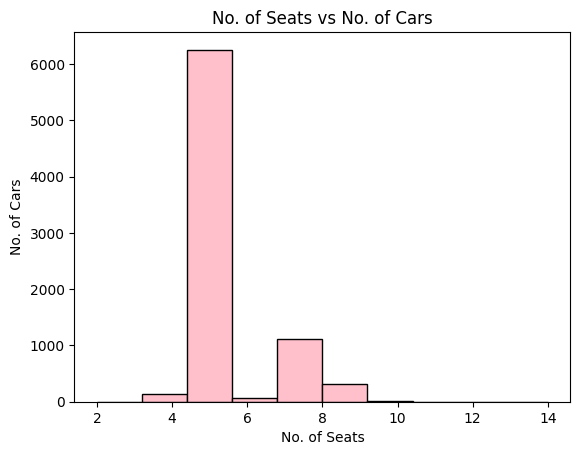

In [55]:
plt.hist(data['seats'], color='pink', edgecolor='black')

plt.title('No. of Seats vs No. of Cars')
plt.xlabel('No. of Seats')
plt.ylabel('No. of Cars')

plt.show()

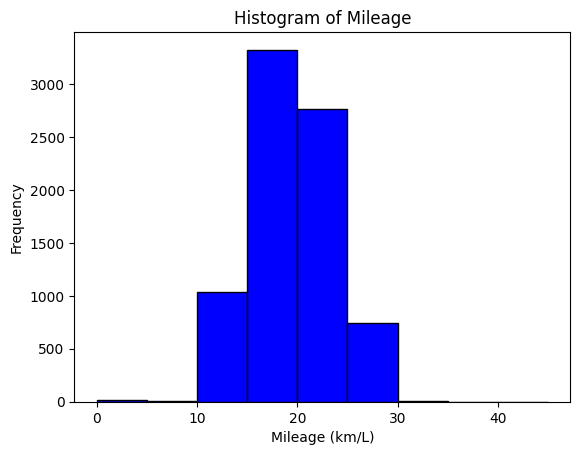

In [57]:
# Define the bin width and range
binwidth = 5
bins = range(int(min(data['mileage'])), int(max(data['mileage'])) + binwidth, binwidth)

plt.hist(data['mileage'], bins=bins, color='blue', edgecolor='black')

plt.title('Histogram of Mileage')
plt.xlabel('Mileage (km/L)')
plt.ylabel('Frequency')

plt.show()

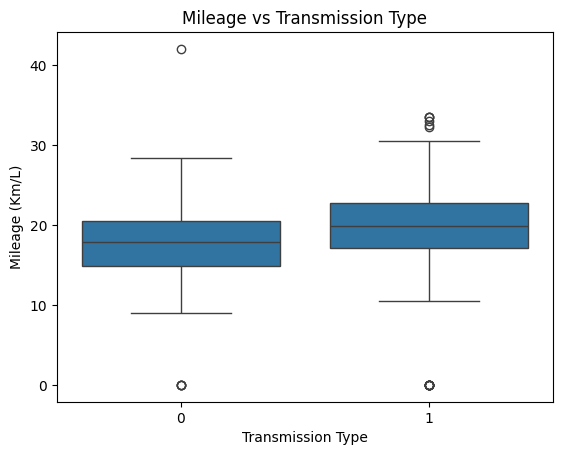

In [193]:
# Create a boxplot
sns.boxplot(x=data['transmission_type'], y=data['mileage'], data=data)

# Add title and labels
plt.title('Mileage vs Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Mileage (Km/L)')

# Display the plot
plt.show()

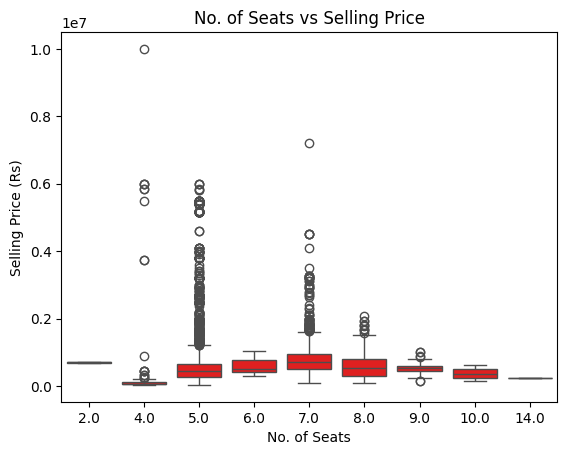

In [198]:
# Create a boxplot
sns.boxplot(x=data['seats'], y=data['selling_price'], data=data, color='red')

# Add title and labels
plt.title('No. of Seats vs Selling Price')
plt.xlabel('No. of Seats')
plt.ylabel('Selling Price (Rs)')

# Display the plot
plt.show()

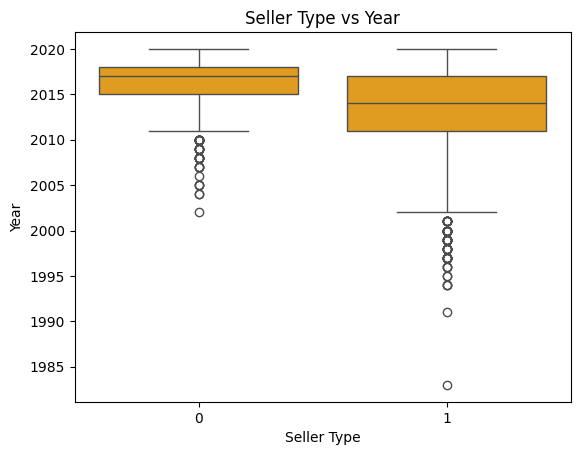

In [218]:
# Create a boxplot
sns.boxplot(x=data['seller'], y=data['year'], data=data, color='orange')

# Add title and labels
plt.title('Seller Type vs Year')
plt.xlabel('Seller Type')
plt.ylabel('Year')

# Display the plot
plt.show()